creating first deep lerning model : perceptron

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [21]:
#creating dataset
features, targets = make_classification(
                                n_samples= 20,
                                n_features= 2,
                                n_informative= 1,
                                n_redundant= 0, 
                                n_clusters_per_class= 1, 
                                random_state=1
)

In [22]:
df = pd.DataFrame(data=features, columns=["x1", "x2"])
df["targets"] = targets
df.head(5)


,x1,x2,targets
0,-0.887629,0.784959,1
1,-0.012665,1.141704,1
2,-0.191836,0.984424,1
3,-0.267888,-0.330421,0
4,-0.935769,-1.883225,0


In [23]:
#check the shape of our target
df.shape

(20, 3)

In [24]:
features.shape

(20, 2)

In [25]:
targets.shape

(20,)

In [26]:
np.bincount(targets)

array([10, 10])

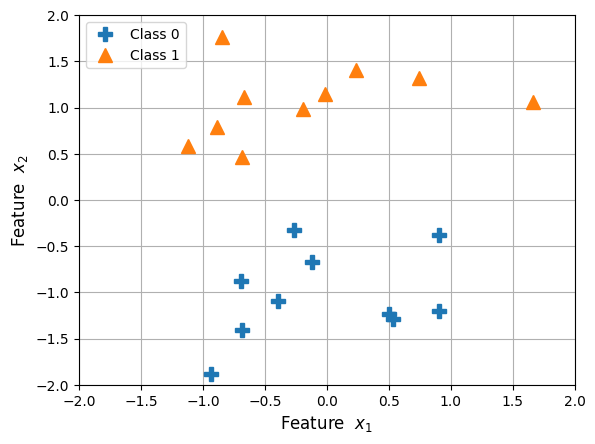

In [27]:
plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker = "P",
    markersize = 10, 
    linestyle = "",
    label = "Class 0"
)
plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker = "^",
    markersize = 10, 
    linestyle = "",
    label = "Class 1"
)

plt.legend(loc = 2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Feature  $x_1$", fontsize = 12)
plt.ylabel("Feature  $x_2$", fontsize = 12)
plt.grid()
plt.show()

In [28]:
# implemention perceptron
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0



In [29]:
ppn = Perceptron(num_features = 2)
ppn.weights

[0.0, 0.0]

In [30]:
ppn.bias

0

In [39]:
# implementing a forward function
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0
    def forward(self, x):
        weighted_sum = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum += x[i] * self.weights[i]

        if weighted_sum > 0:
            prediction = 1
        else:
            prediction = 0
            
        return prediction

In [40]:
ppn = Perceptron(num_features= 2)
x = [1.23, 2.13]
ppn.forward(x)

0

In [41]:
# implemnting the update function to enable learning
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0
    def forward(self, x):
        weighted_sum = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum += x[i] * self.weights[i]

        if weighted_sum > 0:
            prediction = 1
        else:
            prediction = 0
            
        return prediction
        
    def update(self, x, y_true):
        prediction = self.forward(x)
        error = y_true - prediction

        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]

        return error



In [42]:
ppn = Perceptron(num_features= 2)
x = [1.1, 2.1]
ppn.update(x, y_true=1)

1

In [43]:
print("Model Parameters")
print(f"Weight:{ppn.weights}")
print(f"Bias:{ppn.bias}")

Model Parameters
Weight:[1.1, 2.1]
Bias:1


In [44]:
# training the model
def train(model, X_train, y_train, epochs):
    # training loop
    for epoch in range(epochs):
        error_count = 0

        for x,y in zip(X_train, y_train):
            error = model.update(x,y)
            error_count += abs(error)

        print(f"Epoch {epoch + 1} errors {error_count}")




In [45]:
ppn = Perceptron(num_features = 2)
train(ppn, features, targets, epochs = 5)

Epoch 1 errors 2
Epoch 2 errors 0
Epoch 3 errors 0
Epoch 4 errors 0
Epoch 5 errors 0


In [38]:
print("Model Parameters")
print(f"Weight:{ppn.weights}")
print(f"Bias:{ppn.bias}")

Model Parameters
Weight:[np.float64(-0.18708699898117975), np.float64(59.45422637719843)]
Bias:0
